In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/test.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
ID = df["Id"]

In [5]:
df=df.drop("Id", axis=1)

In [6]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [7]:
def percent_missing(df):
    percent_nan = 100 * df.isna().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [8]:
percent_nan = percent_missing(df)

In [9]:
len(percent_nan)

33

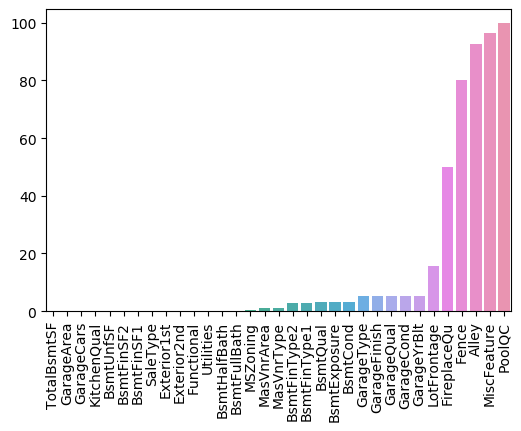

In [10]:
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=percent_nan.index , y= percent_nan)
plt.xticks(rotation=90);
#plt.ylim(0,1);

In [11]:
percent_nan[percent_nan < 1]

TotalBsmtSF     0.06854
GarageArea      0.06854
GarageCars      0.06854
KitchenQual     0.06854
BsmtUnfSF       0.06854
BsmtFinSF2      0.06854
BsmtFinSF1      0.06854
SaleType        0.06854
Exterior1st     0.06854
Exterior2nd     0.06854
Functional      0.13708
Utilities       0.13708
BsmtHalfBath    0.13708
BsmtFullBath    0.13708
MSZoning        0.27416
dtype: float64

In [12]:
num_cols= ['BsmtHalfBath', 'BsmtFullBath', 'GarageCars']
df[num_cols] = df[num_cols].fillna(0)

num_cols1= [ 'TotalBsmtSF' ,'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF','GarageArea', 'GarageCars']
df[num_cols1] = df[num_cols1].fillna(1)


str_cols = [ 'Exterior1st', 'Exterior2nd']
df[str_cols] = df[str_cols].fillna('VinylSd')

df['KitchenQual'] = df['KitchenQual'].fillna('Fa')

## SaleType as Oth
df['SaleType'] = df['SaleType'].fillna('Oth')

## Functional as Typ
df['Functional'] = df['Functional'].fillna('Typ')

## Utilities as AllPub
df['Utilities'] = df['Utilities'].fillna('AllPub')

## MSZoning as C (all)
df['MSZoning'] = df['MSZoning'].fillna('C (all)')


In [13]:
df['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)'], dtype=object)

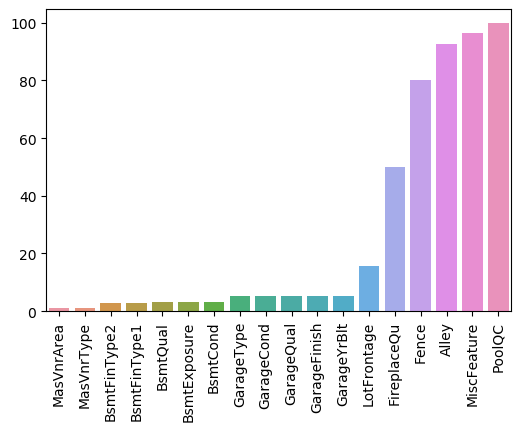

In [14]:
percent_nan = percent_missing(df)

plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=percent_nan.index , y= percent_nan)
plt.xticks(rotation=90);
#plt.ylim(0,1);

In [15]:
##Finally let's fill MasVnrType and MasVnrArea with  as None and 0.

df['MasVnrType']=df['MasVnrType'].fillna('None')

df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [16]:
## Filling Categorical Columns with None
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

## None for categorical column
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

## 0 for Numerical Column
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

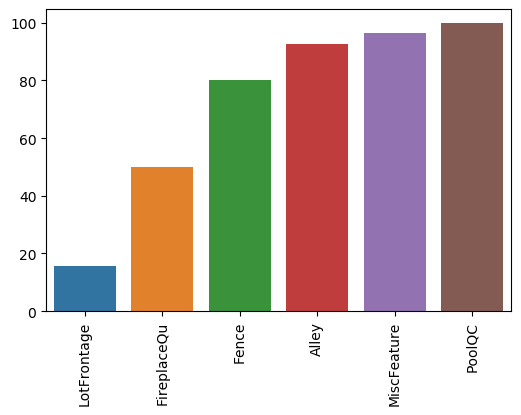

In [17]:
percent_nan = percent_missing(df)

plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=percent_nan.index , y= percent_nan)
plt.xticks(rotation=90);

In [18]:
# Now out of these 6 columns, lets drop few which has more NULL values
df= df.drop(['PoolQC' , 'MiscFeature', 'Alley', 'Fence'],axis=1)

In [19]:
##Will replace Fireplace missing values with None

df["FireplaceQu"]= df["FireplaceQu"].fillna("None")

df["LotFrontage"]=df.groupby("Neighborhood")["LotFrontage"].transform(lambda value:value.fillna(value.mean()))

In [20]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

## Dealing with Categorical Data

In [21]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [22]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [23]:
my_object_df = df.select_dtypes(include='object') 

my_numeric_df = df.select_dtypes(exclude='object')

In [24]:
my_object_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [25]:
my_object_dummies

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
final_test_df = pd.concat([my_object_dummies , my_numeric_df], axis=1)

In [27]:
list_of_cols = ['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
                'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
                'Exterior2nd_Other', 'GarageQual_Fa', 'Heating_GasA', 'Heating_OthW',
                'HouseStyle_2.5Fin', 'RoofMatl_Membran', 'RoofMatl_Metal','RoofMatl_Roll',  'Utilities_NoSeWa']

for cols in list_of_cols:
    final_test_df[cols] =0

In [28]:
final_test_df["Id"] = ID

In [29]:
final_test_df

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,Exterior2nd_Other,GarageQual_Fa,Heating_GasA,Heating_OthW,HouseStyle_2.5Fin,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,Utilities_NoSeWa,Id
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1461
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1462
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1463
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1464
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2915
1455,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2916
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2917
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2918


### Arranging the columns in ascending order

In [30]:
columns_list = final_test_df.columns.tolist()

In [31]:
columns_list.sort()

In [32]:
final_test_df = final_test_df[columns_list]

In [33]:
final_test_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,...,SaleType_WD,ScreenPorch,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,0,0,0,0,0,0,...,1,120,1,5,882.0,0,140,1961,1961,2010
1,1329,0,0,3,0,0,0,0,0,0,...,1,0,1,6,1329.0,0,393,1958,1958,2010
2,928,701,0,3,0,0,0,0,0,0,...,1,0,1,6,928.0,0,212,1997,1998,2010
3,926,678,0,3,0,0,0,0,0,0,...,1,0,1,7,926.0,0,360,1998,1998,2010
4,1280,0,0,2,0,0,0,1,0,0,...,1,144,1,5,1280.0,0,0,1992,1992,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0,0,1,0,0,0,...,1,0,1,5,546.0,0,0,1970,1970,2006
1455,546,546,0,3,0,0,0,1,0,0,...,1,0,1,6,546.0,0,0,1970,1970,2006
1456,1224,0,0,4,0,0,0,0,0,0,...,1,0,1,7,1224.0,0,474,1960,1996,2006
1457,970,0,0,3,0,0,0,0,0,0,...,1,0,1,6,912.0,0,80,1992,1992,2006


In [34]:
final_test_df.to_csv("../DATA/final_test_df.csv", index=False)